## 🧠 Deep Learning — Explanation

Deep Learning is a **subset of Machine Learning** that uses **artificial neural networks with many hidden layers** to learn complex patterns from data. It is inspired by the way the **human brain** works, where neurons process and transmit information.

Unlike traditional machine learning, deep learning **automatically learns features** from raw data, reducing the need for manual feature engineering.

---

### 🔹 Why Deep Learning is Important

Traditional machine learning models:
- Require manual feature extraction  
- Struggle with unstructured data (images, text, audio)  

Deep learning solves these problems by:
- Learning features automatically  
- Handling large-scale and unstructured data  
- Capturing complex non-linear relationships  

---

### 🔹 How Deep Learning Works

A deep learning model consists of:
- **Input layer** – receives raw data  
- **Hidden layers** – learn patterns and representations  
- **Output layer** – produces predictions  

Each neuron performs a weighted sum of inputs, adds a bias, and applies an **activation function**.

---

### 🔹 Why It Is Called “Deep”

The term *deep* refers to the presence of **multiple hidden layers** in the neural network.  
More layers allow the model to learn more abstract and complex features.

---

### 🔹 Learning Process

1. **Forward propagation**: Data flows through the network to make a prediction  
2. **Loss calculation**: Error between predicted and actual output is measured  
3. **Backpropagation**: Weights are adjusted to minimize error  
4. **Optimization**: Repeated until performance improves  

---

### 🔹 Common Activation Functions

- ReLU – most commonly used  
- Sigmoid – binary outputs  
- Softmax – multi-class outputs  

---

### 🔹 Types of Deep Learning Models

- **ANN** – structured data  
- **CNN** – images and videos  
- **RNN / LSTM** – sequences and time series  
- **Transformers** – modern NLP models  

---

### 🎯 Aim of Deep Learning

- Learn complex patterns  
- Work directly with raw data  
- Achieve high accuracy on difficult tasks  

---

### 📌 Where Deep Learning is Used

- Image recognition  
- Speech recognition  
- Natural Language Processing  
- Recommendation systems  
- Autonomous vehicles  

---

### 🧠 In Simple Words

Deep Learning teaches computers to learn patterns from large amounts of data using layered neural networks, allowing machines to understand images, language, and speech.

---

### 🟢 Summary

Deep Learning is a powerful machine learning technique that uses deep neural networks to automatically learn representations from data and solve complex real-world problems.


## 📉 Gradient Descent

Gradient Descent is a method used to **reduce error** by **updating model weights step by step**.

👉 It moves the model in the direction where the **loss decreases**.

**One-line explanation:**  
> Gradient Descent is an algorithm that helps a model learn by minimizing its loss.

---
## 🧠 Weights, Bias, and Hidden Layers 

### 🔹 Weights
Weights show **how important an input is**.  
A higher weight means the input has more influence on the output.

👉 In simple words:  
**Weights decide how much each input matters.**

---

### 🔹 Bias
Bias is an **extra value added** to help the model make better decisions.  
It allows the model to shift the decision boundary.

👉 In simple words:  
**Bias helps the model adjust predictions even when inputs are small.**

---

### 🔹 Hidden Layers
Hidden layers are the layers **between input and output**.  
They help the model learn **complex patterns** by combining features.

👉 In simple words:  
**Hidden layers help the model understand complicated relationships.**

---

### 🧠 One-Line Summary
> Weights control importance, bias adds flexibility, and hidden layers learn complex patterns.
---

## 📉 Vanishing Gradient Problem — Simple & Detailed Explanation

The **Vanishing Gradient Problem** happens in **deep neural networks** when gradients become **very small** during training.  
As a result, the model **stops learning or learns extremely slowly**, especially in early layers.

---

## 🔹 What is a Gradient? (Quick Reminder)

A **gradient** tells us:
> How much should we change a weight to reduce the loss?

- Large gradient → big weight update  
- Small gradient → tiny weight update  

---

## 🔹 What Does “Vanishing” Mean?

Vanishing means:
- Gradients become **close to zero**
- Weight updates become **almost nothing**
- Learning almost stops

---

## 🔹 Why Does Vanishing Gradient Happen?

### 1️⃣ Deep Networks
- Gradients are passed through many layers
- Each layer multiplies gradients
- Small numbers × small numbers → **very small values**

---

### 2️⃣ Certain Activation Functions
Activation functions like:
- **Sigmoid**
- **Tanh**

Squash values into small ranges.  
Their derivatives are also small, which causes gradients to shrink layer by layer.

---

### 3️⃣ Poor Weight Initialization
- Very small initial weights
- Gradients shrink quickly during backpropagation

---

## 🔹 What Happens During Backpropagation?

During backpropagation:
- Gradients flow from **output layer → input layer**
- In deep networks, gradients get smaller at each step
- Early layers receive almost zero gradient

👉 Early layers **do not learn anything**.

---

## 🔹 Effects of Vanishing Gradient

- Slow or no learning  
- Poor model accuracy  
- Early layers become useless  
- Training deep networks becomes difficult  

---

## 🔹 Simple Analogy

Imagine passing a message by whispering:
- Each person whispers a little softer
- By the time it reaches the first person, the message is gone

That is vanishing gradient.

---

## 🔹 How to Fix Vanishing Gradient Problem

### ✅ 1. Use ReLU or Leaky ReLU
- Do not squash values
- Maintain stronger gradients

---

### ✅ 2. Proper Weight Initialization
- **He Initialization** for ReLU
- **Xavier Initialization** for Tanh/Sigmoid

---

### ✅ 3. Batch Normalization
- Keeps values in a stable range
- Improves gradient flow

---

### ✅ 4. Residual Connections (ResNet)
- Allow gradients to skip layers
- Helps very deep networks train

---

### ✅ 5. Use Modern Architectures
- CNNs with ReLU
- Transformers instead of deep RNNs

---

## 🔹 Vanishing vs Exploding Gradient (Quick)

| Problem | Gradient Size | Effect |
|------|---------------|--------|
| Vanishing Gradient | Very small | Learning stops |
| Exploding Gradient | Very large | Training unstable |

---

## 🧠 In Simple Words

Vanishing gradient means the model forgets how to learn because gradients become too small to update weights.

---

## 🟢 One-Line Summary

> The vanishing gradient problem occurs when gradients become too small during training, causing deep neural networks to stop learning.


 PERCEPTRONS

## Perceptron — Simple and Detailed Explanation

A **Perceptron** is the **simplest form of a neural network**. It is a basic model that helps a computer **make a yes-or-no decision**. In simple words, a perceptron looks at input data and decides whether the answer should be **0 or 1**.

It is mainly used for **binary classification**, meaning problems where there are only two possible outcomes.

---

### What Problem Does a Perceptron Solve?

A perceptron answers questions like:
- Is this email spam or not?
- Should this loan be approved or rejected?
- Does this image contain a cat or not?

Each of these questions has only two possible answers.

---

### How a Perceptron Thinks

A perceptron does not think like a human, but it follows a **simple rule-based process**.

It:
1. Takes input values  
2. Gives importance to each input  
3. Adds everything together  
4. Makes a final decision  

---

### Inputs and Weights (Very Important)

- **Inputs** are the features of the data (for example: marks, age, income).
- **Weights** tell the model how important each input is.

If a weight is:
- Large → that input is very important  
- Small → that input is less important  
- Negative → that input works against the decision  

---

### What Is Bias?

Bias is like a **starting point** or **extra push** that helps the perceptron make a decision.

Without bias:
- The decision boundary would be very limited  
- The model would be less flexible  

Bias allows the perceptron to shift its decision rule properly.

---

### How the Decision Is Made

The perceptron:
- Multiplies each input by its weight  
- Adds them together  
- Adds bias  
- Checks the result  

If the final value is:
- Positive → output = 1  
- Negative → output = 0  

This simple rule decides the class.

---

### How Does the Perceptron Learn?

Learning means **correcting mistakes**.

- If the perceptron makes a wrong prediction  
- It slightly changes the weights  
- So that next time, the prediction is better  

By repeating this process on many examples, the perceptron learns the correct decision rule.

---

### What Does the Perceptron Learn?

It learns a **straight line (or plane)** that separates the data into two groups.

One side of the line → class 0  
Other side of the line → class 1  

This line is called the **decision boundary**.

---

### Why Perceptron Has Limitations

A perceptron can only draw **straight lines**.

So it:
- Works only when data can be separated linearly  
- Cannot solve complex problems like XOR  

This is why single perceptrons are not enough for complex tasks.

---

### Why Perceptron Is Still Important

Even though it is simple:
- It introduced the idea of learning from data  
- It is the foundation of neural networks  
- Modern deep learning models are built using many perceptrons  

---

### In One Simple Sentence

> A perceptron is a simple decision-making model that learns how to separate data into two groups using a straight line.

---

### Final Summary

The perceptron is the starting point of neural networks. It teaches the basic ideas of inputs, weights, bias, learning, and decision boundaries. Understanding perceptron makes it much easier to understand deep learning later.


## 🧠 Perceptron — Interview Questions & Answers

### 1. What is a perceptron?
A perceptron is the simplest neural network model used for binary classification. It makes a yes-or-no decision based on input features.

---

### 2. What type of problems can a perceptron solve?
Perceptron can solve only **linearly separable problems**, where data can be separated using a straight line.

---

### 3. Is perceptron supervised or unsupervised?
Perceptron is a **supervised learning** algorithm because it learns using labeled data.

---

### 4. What are the main components of a perceptron?
- Inputs  
- Weights  
- Bias  
- Activation function  
- Output  

---

### 5. What is the role of weights in a perceptron?
Weights represent the importance of each input feature in making the final decision.

---

### 6. Why do we need bias in a perceptron?
Bias allows the model to shift the decision boundary and make more flexible predictions.

---

### 7. What activation function does perceptron use?
Perceptron uses a **step (threshold) activation function**.

---

### 8. What is a decision boundary?
A decision boundary is a straight line (or plane) that separates data into two classes.

---

### 9. How does a perceptron learn?
It learns by adjusting weights whenever it makes a wrong prediction.

---

### 10. What is the perceptron learning rule?
Weights are updated based on the difference between actual and predicted output.

---

### 11. Why can’t perceptron solve the XOR problem?
Because XOR data is **not linearly separable**, and perceptron can only learn linear boundaries.

---

### 12. What happens if data is not linearly separable?
The perceptron will not converge and keep updating weights endlessly.

---

### 13. What is a single-layer perceptron?
A perceptron with no hidden layers.

---

### 14. Can perceptron be used for multi-class classification?
Not directly. Extensions like **Multi-Layer Perceptron (MLP)** are used.

---

### 15. Difference between perceptron and logistic regression?
- Perceptron uses a step function  
- Logistic regression uses a sigmoid function  

---

### 16. What is the learning rate?
It controls how much the weights change during training.

---

### 17. Is perceptron still used in real-world applications?
Rarely used directly, but it is the foundation of modern neural networks.

---

### 18. What is convergence in perceptron?
Convergence occurs when the perceptron correctly classifies all training examples.

---

### 19. What is the output of a perceptron?
A binary output: 0 or 1.

---

### 20. One-line interview answer:
> A perceptron is a basic neural network model that performs binary classification using a linear decision boundary.

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
plt.style.use("fivethirtyeight")

In [2]:
import numpy as np

class Perceptron:
    def __init__(self, eta, epochs):
        self.eta = eta
        self.epochs = epochs
        self.weights = None

    def activationFunction(self, inputs, weights):
        z = np.dot(inputs, weights)
        return np.where(z > 0, 1, 0)

    def fit(self, X, y):
        self.X = X
        self.y = y

        # Add bias term (column of -1s)
        X_with_bias = np.c_[self.X, -np.ones((len(self.X), 1))]
        print(f"X_with_bias:\n{X_with_bias}")

        # Initialize weights dynamically
        self.weights = np.random.randn(X_with_bias.shape[1]) * 1e-4
        print(f"Initial weights:\n{self.weights}")

        for epoch in range(self.epochs):
            print(f"for epoch: {epoch}")
            y_hat = self.activationFunction(X_with_bias, self.weights)
            print(f"predicted value:\n{y_hat}")

            error = self.y - y_hat
            print(f"error:\n{error}")

            self.weights = self.weights + self.eta * np.dot(X_with_bias.T, error)
            print(f"updated weights:\n{self.weights}")
            print("############")

    def predict(self, X):
        X_with_bias = np.c_[X, -np.ones((len(X), 1))]
        return self.activationFunction(X_with_bias, self.weights)


In [38]:
import random

# -------------------------------
# DEFINE INPUT SIZE
# -------------------------------
n_features = 2        # number of input features (e.g., x1 and x2)

# -------------------------------
# INITIALIZE PARAMETERS
# -------------------------------
weights = [random.random() for _ in range(n_features)]  # random weights
bias = random.random()                                  # bias
learning_rate = 0.01                                    # learning rate
epochs = 100                                            # number of training iterations

# -------------------------------
# TRAINING DATA (example)
# -------------------------------
# Each item = (input_features, actual_label)
training_data = [
    ([0, 0], 0),
    ([0, 1], 0),
    ([1, 0], 0),
    ([1, 1], 1)
]

# -------------------------------
# TRAINING LOOP
# -------------------------------
for epoch in range(epochs):
    for x, y in training_data:

        # Forward propagation
        z = sum(w * xi for w, xi in zip(weights, x)) + bias

        # Step activation function
        y_pred = 1 if z >= 0 else 0

        # Error calculation
        error = y - y_pred

        # Update weights
        for i in range(len(weights)):
            weights[i] += learning_rate * error * x[i]

        # Update bias
        bias += learning_rate * error

AND OPERATION

In [3]:
data = {"X1" :[0,0,1,1], "X2" :[0,1,0,1], "y":[0,0,0,1]}

AND = pd.DataFrame(data)
AND

,X1,X2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [4]:
y = AND['y']
y.to_frame()

,y
0,0
1,0
2,0
3,1


ACTIVATION FUNCTION

## ⚡ Activation Function — Explanation with Types, Advantages & Disadvantages

An **activation function** decides **how much output a neuron should produce** after receiving inputs.

In simple words:  
> Activation functions decide whether a neuron should be active and how strong its output should be.

They are essential because they add **non-linearity**, which allows neural networks to learn **complex patterns**.

---

## 🔹 Why Activation Functions Are Needed

Without activation functions:
- Neural networks become **linear**
- Multiple layers behave like a single layer
- Complex problems cannot be solved

Activation functions make deep learning possible.

---

## 🔹 How Activation Function Works

Each neuron:
1. Takes weighted inputs and bias  
2. Computes a value  
3. Applies an activation function  
4. Sends output to the next layer  

---

## 🔹 Types of Activation Functions

---

## 1️⃣ Step (Threshold) Function

The step activation function outputs a binary result based on a fixed threshold. If the input exceeds the threshold, the neuron activates; otherwise, it remains inactive. This function was used in early neural network models such as the **Perceptron** for simple binary classification. However, because the function is **not differentiable** and produces abrupt output changes, it cannot support gradient-based learning like backpropagation. Therefore, it is not used in modern deep learning.

**How it works:**
- Output = 1 if input ≥ 0  
- Output = 0 otherwise  

**Advantages:**
- Simple logic  
- Used in early perceptrons  

**Disadvantages:**
- Not differentiable  
- Cannot be used with backpropagation  
- Not suitable for deep learning  

---

## 2️⃣ Sigmoid Function

The sigmoid activation function maps input values into a smooth range between **0 and 1**, making it suitable for probability-based outputs. It was introduced to overcome the non-differentiability of the step function and enabled backpropagation. However, sigmoid compresses large input values into very small gradients, leading to the **vanishing gradient problem** in deep networks. For this reason, it is rarely used in hidden layers today but is still used in binary classification output layers.

**Output Range:** 0 to 1  

**Advantages:**
- Output interpretable as probability  
- Smooth curve  

**Disadvantages:**
- Vanishing gradient problem  
- Slow learning  
- Not zero-centered  

**Used in:**
- Binary classification (output layer)

---

## 3️⃣ Tanh (Hyperbolic Tangent) Function

The tanh activation function is a scaled and shifted version of sigmoid that outputs values between **−1 and +1**. Its zero-centered nature improves optimization by balancing positive and negative activations. Although tanh provides stronger gradients than sigmoid near zero, it still suffers from vanishing gradients for large input values, limiting its effectiveness in very deep networks.

**Output Range:** −1 to +1  

**Advantages:**
- Zero-centered output  
- Better gradient flow than sigmoid  

**Disadvantages:**
- Vanishing gradient problem  
- Slow for deep networks  

---

## 4️⃣ ReLU (Rectified Linear Unit)

ReLU is the most widely used activation function in modern deep learning. It outputs **zero for negative inputs** and passes **positive inputs unchanged**. This avoids saturation in the positive region, allowing strong gradient flow and efficient training of deep networks. ReLU significantly reduced the vanishing gradient problem, making deep architectures practical. However, neurons can become permanently inactive if they consistently receive negative inputs, known as the **dead neuron problem**.

**Rule:**  
\[
f(x) = \max(0, x)
\]

**Advantages:**
- Fast computation  
- Reduces vanishing gradient problem  
- Most widely used activation function  

**Disadvantages:**
- Dead neuron problem  
- Not zero-centered  
- Neurons may stop learning for negative inputs  

**Used in:**
- Hidden layers of deep neural networks

---

## 5️⃣ Leaky ReLU

Leaky ReLU was introduced to solve the dead neuron problem of ReLU by allowing a **small, non-zero gradient** for negative input values. Instead of completely blocking negative signals, it allows a small slope, ensuring neurons continue to learn even for negative inputs. While it improves gradient flow, it introduces an extra hyperparameter.

**How it works:**
- Allows small negative values  

**Advantages:**
- Solves dead neuron problem  
- Better gradient flow  

**Disadvantages:**
- Slightly more complex  
- No universally optimal slope value  

---

## 6️⃣ Softmax Function

Softmax is used in the **output layer** of multi-class classification models. It converts raw scores into a probability distribution where the sum of all outputs equals **1**. Softmax highlights the most likely class while suppressing others and works best with categorical cross-entropy loss.

**What it does:**
- Converts outputs into probabilities  
- Sum of probabilities = 1  

**Advantages:**
- Best for multi-class classification  
- Clear probabilistic output  

**Disadvantages:**
- Computationally expensive  
- Sensitive to large input values  

**Used in:**
- Output layer for multi-class classification

---

## 7️⃣ ELU (Exponential Linear Unit)

ELU was introduced to improve ReLU by allowing **smooth negative outputs**, which helps keep mean activations closer to zero and reduces bias shift. For positive values, ELU behaves like ReLU. For negative values, it applies an exponential curve, improving gradient flow and convergence speed. Despite its theoretical advantages, ELU is less commonly used due to higher computational cost.

**Formula:**
\[
f(x) =
\begin{cases}
x, & x > 0 \\
\alpha(e^x - 1), & x \le 0
\end{cases}
\]

---

## 🔹 Which Activation Function to Use

| Layer Type | Activation Function |
|-----------|--------------------|
| Hidden Layer | ReLU / Leaky ReLU |
| Binary Output | Sigmoid |
| Multi-Class Output | Softmax |
| Regression Output | Linear |

---

## 🔹 Vanishing Gradient (Short)

- Gradients become very small  
- Weights stop updating  
- Network stops learning  

Occurs mainly with:
- Sigmoid  
- Tanh  

ReLU helps reduce this problem.

---

## 🔹 Activation Function vs Loss Function

- **Activation function** → Controls neuron output  
- **Loss function** → Measures prediction error  

They are **not the same**.

---

## 🟢 Final Summary

- Activation functions add non-linearity  
- They control neuron output strength  
- Different tasks require different activations  
- ReLU is the most commonly used activation function  

Without activation functions, deep learning would not work.


---
---
---

In [39]:
import math
import numpy as np

# -------------------------------
# ACTIVATION FUNCTIONS
# -------------------------------

def step(x):
    # Step (Threshold) activation
    return 1 if x >= 0 else 0


def sigmoid(x):
    # Sigmoid activation
    return 1 / (1 + math.exp(-x))


def tanh(x):
    # Tanh activation
    return math.tanh(x)


def relu(x):
    # ReLU activation
    return max(0, x)


def leaky_relu(x, alpha=0.01):
    # Leaky ReLU activation
    return x if x > 0 else alpha * x


def elu(x, alpha=1.0):
    # ELU activation
    return x if x > 0 else alpha * (math.exp(x) - 1)


def softmax(x):
    # Softmax activation (for list or numpy array)
    x = np.array(x)
    exp_values = np.exp(x - np.max(x))  # for numerical stability
    return exp_values / np.sum(exp_values)


# -------------------------------
# TESTING THE FUNCTIONS
# -------------------------------

x = -2

print("Step:", step(x))
print("Sigmoid:", sigmoid(x))
print("Tanh:", tanh(x))
print("ReLU:", relu(x))
print("Leaky ReLU:", leaky_relu(x))
print("ELU:", elu(x))

scores = [2.0, 1.0, 0.1]
print("Softmax:", softmax(scores))

Step: 0
Sigmoid: 0.11920292202211755
Tanh: -0.9640275800758169
ReLU: 0
Leaky ReLU: -0.02
ELU: -0.8646647167633873
Softmax: [0.65900114 0.24243297 0.09856589]


## 📉 Loss Function in Deep Learning — Detailed Explanation

A **loss function** is a mathematical function that measures **how wrong a model’s prediction is** compared to the actual output.

In simple words:  
> A loss function tells the model **how big its mistake is**.

The main goal of training a deep learning model is to **minimize the loss**.

---

## 🔹 Why Loss Functions Are Important in Deep Learning

In deep learning training:

1. Forward propagation → model makes prediction  
2. Loss function → calculates error  
3. Backpropagation → computes gradients  
4. Optimizer → updates weights  

Without a loss function:
- The model does not know if it is right or wrong  
- No gradient can be computed  
- Learning is impossible  

Loss function acts like a **teacher** that guides learning.

---

## 🔹 Loss Function vs Cost Function

- **Loss Function** → Error for a single data point  
- **Cost Function** → Average loss over entire dataset  

In practice, both terms are often used interchangeably in deep learning.

---

## 🔹 Types of Loss Functions in Deep Learning

Loss functions depend on the **type of problem**.

---

## 🔸 1. Loss Functions for Regression

Regression means predicting **continuous values** (price, temperature, score).

---

### Mean Squared Error (MSE)

MSE calculates the average of squared differences between actual and predicted values.

**Formula:**
\[
MSE = \frac{1}{n}\sum (y - \hat{y})^2
\]

**Theory:**
- Squaring penalizes large errors more  
- Smooth curve → easy optimization  

**Advantages:**
- Differentiable  
- Works well with gradient descent  

**Disadvantages:**
- Very sensitive to outliers  

**Used in:**
- Regression neural networks  
- Continuous value prediction  

---

### Mean Absolute Error (MAE)

MAE computes the average absolute difference.

**Formula:**
\[
MAE = \frac{1}{n}\sum |y - \hat{y}|
\]

**Theory:**
- Treats all errors equally  
- Robust to outliers  

**Disadvantages:**
- Not smooth at zero  
- Slower convergence than MSE  

---

### Huber Loss

Huber loss combines MSE and MAE.

**Theory:**
- Uses MSE for small errors  
- Uses MAE for large errors  

**Why used:**
- Stable learning  
- Less sensitive to outliers  

---

## 🔸 2. Loss Functions for Classification

Classification means predicting **categories or classes**.

---

### Binary Cross-Entropy Loss

Used for **binary classification** problems.

**Examples:**
- Spam vs Not Spam  
- Disease vs No Disease  

**Theory:**
- Penalizes confident wrong predictions heavily  
- Works with sigmoid activation  

**Behavior:**
- Correct prediction → low loss  
- Confident wrong prediction → very high loss  

**Used in:**
- Binary classification neural networks  

---

### Categorical Cross-Entropy Loss

Used for **multi-class classification**.

**Examples:**
- Image classification  
- Digit recognition  

**Theory:**
- Encourages correct class probability to be high  
- Works with softmax activation  

**Used in:**
- CNNs  
- Multi-class classifiers  

---

### Sparse Categorical Cross-Entropy

Same as categorical cross-entropy but:
- Uses integer labels instead of one-hot encoding  
- Saves memory  

---

## 🔸 3. Special Loss Functions

---

### Hinge Loss

Used in margin-based classifiers.

**Theory:**
- Encourages predictions with a margin  
- Penalizes weak correct predictions  

**Used in:**
- SVM-inspired neural networks  

---

### Kullback–Leibler (KL) Divergence

Measures difference between two probability distributions.

**Used in:**
- Variational Autoencoders (VAE)  
- Probabilistic deep learning models  

---

## 🔹 Choosing the Right Loss Function

| Problem Type | Loss Function |
|-------------|--------------|
| Regression | MSE, MAE, Huber |
| Binary Classification | Binary Cross-Entropy |
| Multi-Class Classification | Categorical Cross-Entropy |
| Probabilistic Models | KL Divergence |

---

## 🔹 How Loss Function Helps Learning

- Loss value quantifies error  
- Backpropagation computes gradient of loss  
- Optimizer updates weights  
- Loss decreases gradually  

Lower loss → better model performance.

---

## 🔹 Common Interview Questions

**Q: Why is cross-entropy preferred over MSE for classification?**  
Because it provides stronger gradients and faster convergence.

**Q: Can loss function and activation function be the same?**  
No. Activation controls neuron output, loss measures prediction error.

**Q: What happens if loss function is poorly chosen?**  
Training becomes slow, unstable, or inaccurate.

---

## 🧠 In Simple Words

Loss functions tell the model **how wrong it is**, so it can correct itself and improve step by step.

---

## 🟢 Final Summary

- Loss function measures prediction error  
- It is essential for training deep learning models  
- Different tasks require different loss functions  
- Backpropagation and optimization depend on loss  

Without a loss function, **deep learning cannot learn**.


In [41]:
import numpy as np
import math

# -------------------------------
# LOSS FUNCTIONS
# -------------------------------

def mean_squared_error(y_true, y_pred):
    """
    Mean Squared Error (MSE)
    Used for regression problems.
    Penalizes large errors more.
    """
    # Calculate squared difference and take average
    return np.mean((y_true - y_pred) ** 2)


def mean_absolute_error(y_true, y_pred):
    """
    Mean Absolute Error (MAE)
    Used for regression.
    Treats all errors equally.
    """
    # Calculate absolute difference and take average
    return np.mean(np.abs(y_true - y_pred))


def binary_cross_entropy(y_true, y_pred):
    """
    Binary Cross-Entropy Loss
    Used for binary classification.
    """
    # Avoid log(0) by clipping predicted values
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Apply binary cross-entropy formula and take mean
    return -np.mean(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )


def categorical_cross_entropy(y_true, y_pred):
    """
    Categorical Cross-Entropy Loss
    Used for multi-class classification with one-hot encoded labels.
    """
    # Clip predictions for numerical stability
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Multiply true labels with log of predictions
    # Sum across classes and take mean
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))


def sparse_categorical_cross_entropy(y_true, y_pred):
    """
    Sparse Categorical Cross-Entropy
    Used when class labels are integers (not one-hot encoded).
    """
    # Clip predictions to avoid log(0)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)

    # Select predicted probability of the true class
    return -np.mean(np.log(y_pred[np.arange(len(y_true)), y_true]))


def hinge_loss(y_true, y_pred):
    """
    Hinge Loss
    Used in SVM-based classifiers.
    """
    # Calculate margin loss and take average
    return np.mean(np.maximum(0, 1 - y_true * y_pred))


# -------------------------------
# TESTING THE LOSS FUNCTIONS
# -------------------------------

# Example for regression
y_true_reg = np.array([100, 150, 200])   # actual values
y_pred_reg = np.array([110, 140, 190])   # predicted values

print("MSE:", mean_squared_error(y_true_reg, y_pred_reg))
print("MAE:", mean_absolute_error(y_true_reg, y_pred_reg))

# Example for binary classification
y_true_bin = np.array([1, 0, 1])         # actual labels
y_pred_bin = np.array([0.9, 0.2, 0.8])   # predicted probabilities

print("Binary Cross-Entropy:", binary_cross_entropy(y_true_bin, y_pred_bin))

# Example for multi-class classification (one-hot)
y_true_cat = np.array([
    [1, 0, 0],    # class 0
    [0, 1, 0]     # class 1
])
y_pred_cat = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.8, 0.1]
])

print("Categorical Cross-Entropy:",
      categorical_cross_entropy(y_true_cat, y_pred_cat))

# Example for sparse labels
y_true_sparse = np.array([0, 1])

print("Sparse Categorical Cross-Entropy:",
      sparse_categorical_cross_entropy(y_true_sparse, y_pred_cat))

MSE: 100.0
MAE: 10.0
Binary Cross-Entropy: 0.18388253942874858
Categorical Cross-Entropy: 0.2899092476264711
Sparse Categorical Cross-Entropy: 0.2899092476264711


## 📊 Cost Function in Deep Learning — Detailed Explanation with Types

A **cost function** measures the **overall error of a model across the entire training dataset**.  
It tells us **how well or how badly a deep learning model is performing on average**.

In simple words:  
> A cost function shows the model’s total mistake after looking at all data points.

The main goal of training any deep learning model is to **reduce the cost function**.

---

## 🔹 Cost Function vs Loss Function

- **Loss Function**: Error for a single training example  
- **Cost Function**: Average of losses for all training examples  

Loss looks at individual mistakes, while cost looks at **overall performance**.

---

## 🔹 Why Cost Function Is Important

The cost function is essential because:
- It gives a single value to evaluate model performance  
- It guides **backpropagation**  
- It helps **optimizers** update weights correctly  
- It allows comparison between different models  

Without a cost function:
- The model has no feedback  
- Learning cannot occur  

---

## 🔹 Role of Cost Function in Training

During training:
1. The model makes predictions  
2. Errors are calculated for each data point  
3. The cost function combines all errors  
4. Backpropagation uses this cost to compute gradients  
5. Optimizer updates weights to reduce the cost  

This process continues until the cost becomes minimal.

---

## 🔹 Types of Cost Functions in Deep Learning

Cost functions are chosen based on the **type of problem**.

---

## 1️⃣ Cost Functions for Regression Problems

Regression problems involve predicting **continuous values** such as price, temperature, or marks.

### Mean Squared Error (MSE) Cost
- Penalizes large errors more heavily  
- Encourages the model to avoid big mistakes  
- Smooth behavior helps stable learning  

**Limitation:**
- Very sensitive to outliers  

---

### Mean Absolute Error (MAE) Cost
- Treats all errors equally  
- Less affected by outliers  
- Produces more robust predictions  

**Limitation:**
- Learning can be slower compared to MSE  

---

### Huber Cost
- Combines advantages of MSE and MAE  
- Small errors are treated like MSE  
- Large errors are treated like MAE  

**Why used:**
- Stable learning  
- Robust to outliers  

---

## 2️⃣ Cost Functions for Classification Problems

Classification problems involve predicting **categories or classes**.

---

### Binary Cross-Entropy Cost
Used for **binary classification** problems such as yes/no or true/false.

- Penalizes confident wrong predictions strongly  
- Encourages correct class probabilities  
- Works well with sigmoid activation  

**Common use cases:**
- Spam detection  
- Disease prediction  

---

### Categorical Cross-Entropy Cost
Used for **multi-class classification** problems.

- Encourages the probability of the correct class to be high  
- Works well with softmax activation  
- Helps models learn class separation effectively  

**Common use cases:**
- Image classification  
- Handwritten digit recognition  

---

### Sparse Categorical Cross-Entropy Cost
- Similar to categorical cross-entropy  
- Uses class labels instead of one-hot encoding  
- Saves memory and computation  

---

## 3️⃣ Special Cost Functions

---

### Hinge Cost
- Encourages correct classification with a margin  
- Penalizes weak correct predictions  
- Inspired by Support Vector Machines  

---

### Kullback–Leibler (KL) Divergence Cost
- Measures difference between predicted and target probability distributions  
- Commonly used in probabilistic deep learning models  

**Used in:**
- Variational Autoencoders  
- Generative models  

---

## 🔹 Choosing the Right Cost Function

Choosing the correct cost function depends on:
- Problem type (regression or classification)  
- Output activation function  
- Data distribution  

---

## 🔹 What Happens If Cost Function Is Wrong

If the wrong cost function is chosen:
- Learning becomes slow  
- Model converges to poor solutions  
- Accuracy suffers  
- Training becomes unstable  

---

## 🧠 In Simple Words

Cost function tells the model **how bad it is performing overall**, while training tries to reduce this value step by step.

---

## 🟢 One-Line Interview Answer

> A cost function measures the average error of a model over all training samples and guides the learning process in deep learning.

---

## 🟢 Final Summary

- Cost function measures overall model error  
- It is essential for training and optimization  
- Different problems require different cost functions  
- Reducing cost improves model performance  

Without a cost function, **deep learning cannot learn**.


In [45]:
import numpy as np

# -----------------------------------
# COST FUNCTIONS
# -----------------------------------

def mse_cost(y_true, y_pred):
    # Mean Squared Error cost (regression)
    return np.mean((y_true - y_pred) ** 2)


def mae_cost(y_true, y_pred):
    # Mean Absolute Error cost (regression)
    return np.mean(np.abs(y_true - y_pred))


def binary_cross_entropy_cost(y_true, y_pred):
    # Binary classification cost
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)  # avoid log(0)
    return -np.mean(
        y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)
    )


def categorical_cross_entropy_cost(y_true, y_pred):
    # Multi-class classification cost (one-hot encoded labels)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))


def sparse_categorical_cross_entropy_cost(y_true, y_pred):
    # Multi-class classification (integer labels)
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(np.log(y_pred[np.arange(len(y_true)), y_true]))


# -----------------------------------
# REGRESSION DATASET (LARGER DATA)
# -----------------------------------

np.random.seed(42)

# 100 data points
X = np.linspace(0, 20, 100)
y_true_reg = 4 * X + np.random.normal(0, 5, 100)   # actual values
y_pred_reg = 3.5 * X + 2                           # predicted values

print("Regression Dataset Size:", len(y_true_reg))
print("MSE Cost:", mse_cost(y_true_reg, y_pred_reg))
print("MAE Cost:", mae_cost(y_true_reg, y_pred_reg))

print("-" * 50)

# -----------------------------------
# BINARY CLASSIFICATION DATASET
# -----------------------------------

# 100 samples
y_true_bin = np.random.randint(0, 2, 100)          # actual labels (0 or 1)
y_pred_bin = np.random.uniform(0.05, 0.95, 100)    # predicted probabilities

print("Binary Classification Dataset Size:", len(y_true_bin))
print("Binary Cross-Entropy Cost:",
      binary_cross_entropy_cost(y_true_bin, y_pred_bin))

print("-" * 50)

# -----------------------------------
# MULTI-CLASS CLASSIFICATION DATASET
# -----------------------------------

num_samples = 100
num_classes = 3

# Actual labels (integer form)
y_true_sparse = np.random.randint(0, num_classes, num_samples)

# One-hot encoding
y_true_onehot = np.eye(num_classes)[y_true_sparse]

# Predicted probabilities (Softmax-like)
y_pred_multi = np.random.dirichlet(np.ones(num_classes), size=num_samples)

print("Multi-Class Dataset Size:", num_samples)
print("Categorical Cross-Entropy Cost:",
      categorical_cross_entropy_cost(y_true_onehot, y_pred_multi))

print("Sparse Categorical Cross-Entropy Cost:",
      sparse_categorical_cross_entropy_cost(y_true_sparse, y_pred_multi))

Regression Dataset Size: 100
MSE Cost: 36.24160526008282
MAE Cost: 5.0101863347400455
--------------------------------------------------
Binary Classification Dataset Size: 100
Binary Cross-Entropy Cost: 0.8347885159239772
--------------------------------------------------
Multi-Class Dataset Size: 100
Categorical Cross-Entropy Cost: 1.5203350362324353
Sparse Categorical Cross-Entropy Cost: 1.5203350362324353


## 🔁 Forward and Backward Propagation — Detailed Process Explanation

Forward and Backward Propagation are the **two main processes** that make a neural network work and learn.

- **Forward Propagation** → prediction  
- **Backward Propagation** → learning  

They always work together during training.

---

## 🔹 1. Forward Propagation (Prediction Process)

Forward propagation is the process where data moves **from input layer to output layer** to generate a prediction.

### Step-by-Step Forward Propagation

### Step 1: Input Layer
- Raw data is given to the network  
- Example: pixels of an image, numbers, text features  

Inputs are denoted as:
\[
x_1, x_2, x_3, \dots
\]

---

### Step 2: Weighted Sum in Hidden Layer
Each neuron:
- Multiplies inputs with weights  
- Adds bias  

\[
z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
\]

---

### Step 3: Activation Function
The weighted sum is passed through an **activation function** to introduce non-linearity.

\[
a = f(z)
\]

This output becomes input to the next layer.

---

### Step 4: Repeat for All Layers
- The same process happens in all hidden layers  
- Each layer learns more complex patterns  

---

### Step 5: Output Layer
- Final layer produces prediction  
- Example:
  - Probability (classification)
  - Number (regression)

Predicted output is denoted as:
\[
\hat{y}
\]

---

### Step 6: Loss Calculation
The loss function compares:
- Actual value (y)
- Predicted value (\(\hat{y}\))

\[
Loss = L(y, \hat{y})
\]

This tells **how wrong the prediction is**.

---

## 🔹 2. Backward Propagation (Learning Process)

Backward propagation is the process where the network **learns from its mistakes** by updating weights.

Error flows **from output layer back to input layer**.

---

### Step-by-Step Backward Propagation

### Step 1: Start from Output Layer
- Calculate error using loss function  
- Determine how much the prediction differs from the actual value  

---

### Step 2: Compute Gradients
Gradients measure:
> How much each weight contributed to the error

This is done using the **chain rule**.

\[
\frac{\partial Loss}{\partial w}
\]

You don’t need deep math—just remember:
- Gradients tell **direction and amount of change**

---

### Step 3: Update Weights
Weights are updated to reduce error.

\[
w_{new} = w_{old} - (\text{learning rate} \times \text{gradient})
\]

- Learning rate controls update size  
- Small → slow learning  
- Large → unstable learning  

---

### Step 4: Move Back Through All Layers
- Output layer → hidden layers → input layer  
- Each layer updates its weights  

This backward flow gives the name **backpropagation**.

---

## 🔹 3. One Training Cycle (Epoch)

One **epoch** means:
1. Forward propagation  
2. Loss calculation  
3. Backward propagation  
4. Weight update  

This cycle repeats many times until loss becomes small.

---

## 🔹 Why Both Are Important

| Process | Purpose |
|------|--------|
| Forward Propagation | Make prediction |
| Loss Function | Measure error |
| Backward Propagation | Learn from error |
| Weight Update | Improve model |

---

## 🧠 Simple Analogy

- Forward propagation → student answers exam  
- Loss → marks show mistakes  
- Backward propagation → student learns from mistakes  
- Next attempt → better score  

---

## 🧠 One-Line Understanding

> Forward propagation makes predictions, backward propagation corrects them by updating weights.

---

## 🟢 Final Summary

- Forward propagation sends data forward to predict output  
- Backward propagation sends error backward to adjust weights  
- Together, they allow neural networks to learn and improve over time  

Without forward propagation → no prediction  
Without backward propagation → no learning  


In [46]:
import numpy as np

# -------------------------------
# DATA (Simple Regression Example)
# -------------------------------

X = np.array([1, 2, 3, 4])          # input
y_true = np.array([2, 4, 6, 8])     # actual output (y = 2x)

# -------------------------------
# INITIALIZE PARAMETERS
# -------------------------------

w = np.random.randn()               # weight
b = np.random.randn()               # bias
learning_rate = 0.01
epochs = 1000

# -------------------------------
# TRAINING LOOP
# -------------------------------

for epoch in range(epochs):

    # -------- FORWARD PROPAGATION --------
    y_pred = w * X + b              # model prediction

    # -------- LOSS CALCULATION --------
    loss = np.mean((y_true - y_pred) ** 2)  # MSE loss

    # -------- BACKWARD PROPAGATION --------
    # Compute gradients
    dw = -2 * np.mean(X * (y_true - y_pred))   # gradient w.r.t weight
    db = -2 * np.mean(y_true - y_pred)          # gradient w.r.t bias

    # -------- UPDATE PARAMETERS --------
    w = w - learning_rate * dw
    b = b - learning_rate * db

    # Print loss every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# -------------------------------
# FINAL PARAMETERS
# -------------------------------
print("Final weight:", w)
print("Final bias:", b)

Epoch 0, Loss: 0.1322
Epoch 100, Loss: 0.0719
Epoch 200, Loss: 0.0395
Epoch 300, Loss: 0.0217
Epoch 400, Loss: 0.0119
Epoch 500, Loss: 0.0065
Epoch 600, Loss: 0.0036
Epoch 700, Loss: 0.0020
Epoch 800, Loss: 0.0011
Epoch 900, Loss: 0.0006
Final weight: 1.9849794101160818
Final bias: 0.04416236596987278


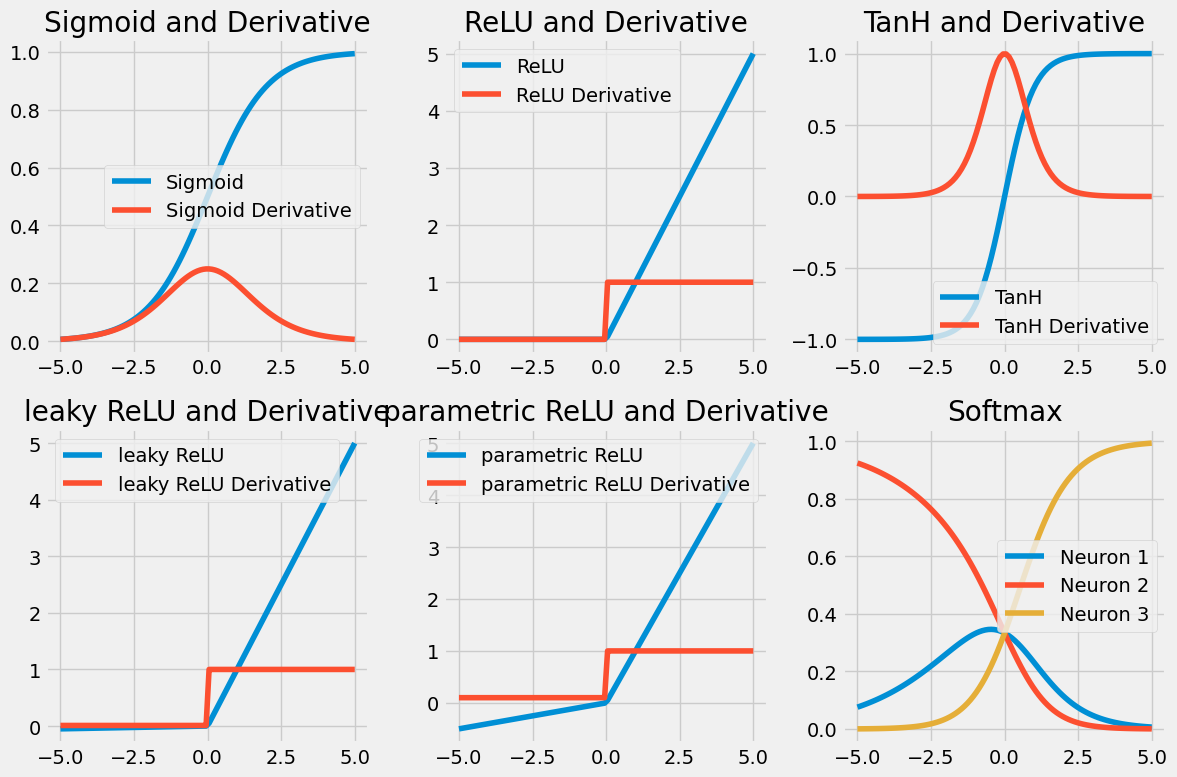

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# derivative of sigmoid activation function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# relu activation function
def relu(x):
    return np.maximum(0, x)

# derivative of relu activation function
def relu_derivative(x):
    return np.where(x <= 0, 0, 1)

# hyperbolic tangent(tanh) activation function
def tanh(x):
    return np.tanh(x)

# derivative of tanh activation function
def tanh_derivative(x):
    return 1 - np.square(tanh(x))

# leaky relu activation function
def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# derivative of leaky relu activation function
def leaky_relu_derivative(x, alpha=0.01):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

# parametric relu activation function
def parametric_relu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

# derivative of parametric relu
def parametric_relu_derivative(x, alpha=0.1):
    dx = np.ones_like(x)
    dx[x < 0] = alpha
    return dx

# softmax activation function
def softmax(x):
    exp_vals = np.exp(x - np.max(x, axis=0))
    return exp_vals / np.sum(exp_vals, axis=0)

# input values
x = np.linspace(-5, 5, 100)

# compute activation functions
sigmoid_y = sigmoid(x)
relu_y = relu(x)
tanh_y = tanh(x)
leaky_relu_y = leaky_relu(x)
parametric_relu_y = parametric_relu(x)
softmax_y = softmax(np.array([x, x / 2, x * 2]))

# compute derivatives
sigmoid_derivative_y = sigmoid_derivative(x)
relu_derivative_y = relu_derivative(x)
tanh_derivative_y = tanh_derivative(x)
leaky_relu_derivative_y = leaky_relu_derivative(x)
parametric_relu_derivative_y = parametric_relu_derivative(x)

# plotting the activation functions and their derivatives
plt.figure(figsize=(12,8))  # smaller size

plt.subplot(2, 3, 1)
plt.plot(x, sigmoid_y, label='Sigmoid')
plt.plot(x, sigmoid_derivative_y, label='Sigmoid Derivative')
plt.title("Sigmoid and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(x, relu_y, label='ReLU')
plt.plot(x, relu_derivative_y, label='ReLU Derivative')
plt.title("ReLU and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 3)
plt.plot(x, tanh_y, label='TanH')
plt.plot(x, tanh_derivative_y, label='TanH Derivative')
plt.title("TanH and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 4)
plt.plot(x, leaky_relu_y, label='leaky ReLU')
plt.plot(x, leaky_relu_derivative_y, label='leaky ReLU Derivative')
plt.title("leaky ReLU and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 5)
plt.plot(x, parametric_relu_y, label='parametric ReLU')
plt.plot(x, parametric_relu_derivative_y, label='parametric ReLU Derivative')
plt.title("parametric ReLU and Derivative")
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 6)
for i, y in enumerate(softmax_y):
    plt.plot(x, y, label=f'Neuron {i+1}')
plt.title("Softmax")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


REGRESSION USING ANN

In [6]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
housing = fetch_california_housing()

In [8]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [9]:
X = pd.DataFrame(housing.data,columns = housing.feature_names)

In [10]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [11]:
y = pd.DataFrame(housing.target,columns = ['target'])

In [12]:
y.head()

,target
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422


In [13]:
X.shape

(20640, 8)

In [14]:
y.shape

(20640, 1)

In [15]:
X_train_full,X_test,y_train_full,y_test = train_test_split(X,y,random_state=42)
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=42)

In [16]:
print(X_train_full.shape)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(15480, 8)
(11610, 8)
(3870, 8)
(5160, 8)


In [17]:
X_train.shape[:1]

(11610,)

In [18]:
LAYERS = [
    tf.keras.layers.Dense(30, activation="relu",input_shape = X_train.shape[1:]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5,  activation="relu"),
    tf.keras.layers.Dense(1)
                          ]

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model = tf.keras.models.Sequential(LAYERS)

In [20]:
LOSS = 'mse'
OPTIMIZER ='sgd'

model.compile(optimizer = OPTIMIZER,loss = LOSS)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             310 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 5)                   │              55 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               6 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 641 (2.50 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
scaler = StandardScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit_transform(X_valid)
X_test = scaler.fit_transform(X_test)

In [24]:
X_train

array([[-0.19397883, -1.07781319, -0.94338545, ..., -0.57291624,
         0.92926047, -1.42215523],
       [ 0.75198318, -1.868895  ,  0.40547793, ...,  0.20516532,
        -0.91654738,  1.09666969],
       [-0.41469108,  0.02970134,  0.81808819, ..., -0.29983271,
         1.30872858, -1.697027  ],
       ...,
       [-1.22332336,  0.50435042, -0.51600328, ...,  0.1344908 ,
        -0.71978613,  1.14664638],
       [-0.93556989,  1.8491895 , -0.10878451, ..., -0.01354498,
         0.52168361, -0.10277075],
       [ 0.89585991,  0.1879177 ,  0.29947528, ..., -0.17823425,
         1.12133692, -1.30720885]], shape=(11610, 8))

In [25]:
EPOCHS = 20 
history = model.fit(X_train,y_train,epochs = EPOCHS,validation_data = (X_valid,y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.7103 - val_loss: 0.5170
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4353 - val_loss: 0.4658
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4021 - val_loss: 0.4507
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3851 - val_loss: 0.4408
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3756 - val_loss: 0.4660
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3719 - val_loss: 0.4287
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3982 - val_loss: 0.4480
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3648 - val_loss: 0.4302
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3541 - val_loss: 0.4433
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3495 - val_loss: 0.4226
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3459 - val_loss: 0.4461
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step

In [26]:
pd.DataFrame(history.history)

,loss,val_loss
0,0.710277,0.517017
1,0.435289,0.465763
2,0.402077,0.450664
3,0.385130,0.440786
4,0.375567,0.466038
5,0.371885,0.428656
6,0.398226,0.447956
7,0.364825,0.430216
8,0.354116,0.443345
9,0.349470,0.422603


<Axes: >

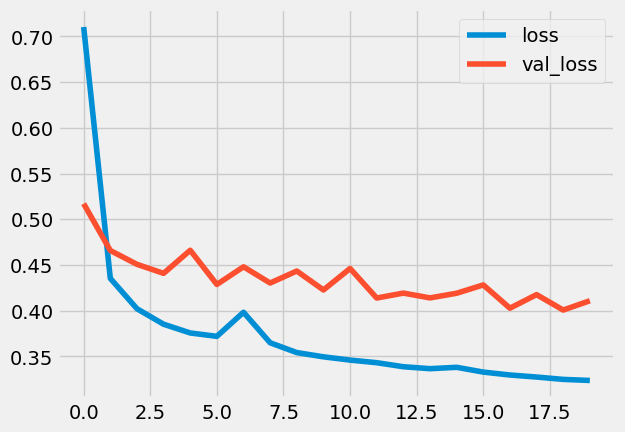

In [27]:
pd.DataFrame(history.history).plot()

In [28]:
model.evaluate(X_test,y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3610


0.36099937558174133

In [29]:
X_test.shape

(5160, 8)

In [30]:
new = X_test[0]

In [31]:
new

array([-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
        0.56243986,  0.22075674,  0.2580042 ])

In [32]:
new.reshape((1,8))

array([[-1.14772246, -0.3014276 , -0.46356103, -0.13026842, -0.0249129 ,
         0.56243986,  0.22075674,  0.2580042 ]])

In [33]:
model.predict(new.reshape((1,8)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step


array([[0.7601546]], dtype=float32)

In [34]:
import tensorflow as tf

# ----------------------------------------
# 1) Build the Model
# ----------------------------------------
model_2 = tf.keras.models.Sequential(LAYERS)
# LAYERS should be defined earlier, e.g.:
# LAYERS = [
#     tf.keras.layers.Dense(64, activation="relu"),
#     tf.keras.layers.Dense(32, activation="relu"),
#     tf.keras.layers.Dense(1)
# ]


# ----------------------------------------
# 2) Compile Model
# ----------------------------------------
LOSS = "mse"   # Mean Squared Error for regression
OPTIMIZER = tf.keras.optimizers.SGD(learning_rate=1e-3)

model_2.compile(
    loss=LOSS,
    optimizer=OPTIMIZER
)


# ----------------------------------------
# 3) Training Settings
# ----------------------------------------
EPOCHS = 20


# ----------------------------------------
# 4) Callbacks
# ----------------------------------------

# Save the best model during training
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(
    "my_model.keras",
    save_best_only=True
)

# Stop training early if validation loss doesn't improve
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=5,
    restore_best_weights=True
)

# Logs for TensorBoard visualization
tensorboard_cb = tf.keras.callbacks.TensorBoard(
    log_dir="logs"
)

CALLBACKS = [checkpoint_cb, early_stopping_cb, tensorboard_cb]


# ----------------------------------------
# 5) Train the Model
# ----------------------------------------
history = model_2.fit(
    X_train, y_train,
    epochs=EPOCHS,
    validation_data=(X_valid, y_valid),
    callbacks=CALLBACKS
)


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.3197 - val_loss: 0.4037
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3175 - val_loss: 0.4027
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3162 - val_loss: 0.4020
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3144 - val_loss: 0.4036
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3129 - val_loss: 0.4009
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3121 - val_loss: 0.4032
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3119 - val_loss: 0.4017
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.3115 - val_loss: 0.4038
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3109 - val_loss: 0.4012
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3107 - val_loss: 0.4004
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3106 - val_loss: 0.4000
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

BATCH NORMALIZATION

## 🔧 Batch Normalization — Simple & Clear Explanation

**Batch Normalization (BatchNorm)** is a technique used in **deep learning** to make neural networks **train faster, more stable, and more accurate**.

In simple words:
> Batch Normalization keeps the data flowing through the network **well-balanced**, so learning becomes easier.

---

## 🔹 Why Batch Normalization Is Needed

During training:
- Values inside the network can become **too large or too small**
- This makes learning **slow and unstable**
- Training deep networks becomes difficult

Batch Normalization solves this by:
- Keeping values in a **normal range**
- Reducing training instability
- Allowing higher learning rates

---

## 🔹 What Batch Normalization Does

Batch Normalization **normalizes the output of a layer** before passing it to the next layer.

It:
1. Takes a mini-batch of data  
2. Normalizes it (mean ≈ 0, variance ≈ 1)  
3. Scales and shifts it using learnable parameters  

---

## 🔹 Step-by-Step Process

For each mini-batch:

### 1️⃣ Compute Mean and Variance
- Mean of batch
- Variance of batch

---

### 2️⃣ Normalize the Values
\[
x_{norm} = \frac{x - mean}{\sqrt{variance + \epsilon}}
\]

This keeps values stable.

---

### 3️⃣ Scale and Shift
\[
y = \gamma \cdot x_{norm} + \beta
\]

- γ (gamma) → scale  
- β (beta) → shift  

These are **learnable parameters**, so the model does not lose flexibility.

---

## 🔹 Where Batch Normalization Is Applied

Usually applied:
- After **linear layer (weights + bias)**
- Before **activation function**

---

## 🔹 Benefits of Batch Normalization

- Faster training  
- More stable learning  
- Reduces vanishing/exploding gradients  
- Acts as a regularizer (reduces overfitting)  
- Allows higher learning rates  

---

## 🔹 Batch Normalization vs No Normalization

| Without BatchNorm | With BatchNorm |
|------------------|----------------|
| Slow training | Faster training |
| Unstable gradients | Stable gradients |
| Sensitive to initialization | More robust |

---

## 🔹 Does Batch Normalization Replace Bias?

Often **yes**.  
Since BatchNorm includes a shift parameter (β), bias can be removed from the previous layer.

---

## 🧠 In Very Simple Words

Batch Normalization keeps numbers inside the network **under control**, so the model learns faster and better.

---

## 🟢 One-Line Summary

> Batch Normalization normalizes layer outputs to stabilize and speed up deep learning training.


In [35]:
#WITHOUT BATCH NORMALIZATION
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

#load and preprocess the data
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0],-1)) / 255.0
X_test = X_test.reshape((X_test.shape[0],-1)) / 255.0

#define model 1: simple feed forward neural network
model1 =  Sequential([
    Dense(32, activation='relu',input_shape=(784,)),
    Dense(32,activation='relu'),
    Dense(10, activation='softmax')
])

#Compile model 1

model1.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#print model 1 summary
model1.summary()

#train model
model1.fit(X_train,y_train,epochs=10,batch_size=32,validation_split=0.1)

#evaluate model 1
test_loss, test_acc = model1.evaluate(X_test,y_test)
print("Model 1 - Test Accuracy:",test_acc)

C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,506 (103.54 KB)

 Trainable params: 26,506 (103.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8906 - loss: 0.3774 - val_accuracy: 0.9513 - val_loss: 0.1742
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9424 - loss: 0.1950 - val_accuracy: 0.9545 - val_loss: 0.1592
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9545 - loss: 0.1529 - val_accuracy: 0.9623 - val_loss: 0.1273
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9622 - loss: 0.1263 - val_accuracy: 0.9615 - val_loss: 0.1218
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9673 - loss: 0.1093 - val_accuracy: 0.9653 - val_loss: 0.1122
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9706 - loss: 0.0963 - val_accuracy: 0.9710 - val_loss: 0.1018
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9730 - loss: 0.0864 - val_accuracy: 0.9670 - val_loss: 0.1121
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9760 - loss: 0.0768

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

# Define model 2: with Batch Normalization
model2 = Sequential([
    Dense(32, activation='relu', input_shape=(784,)),
    BatchNormalization(),  # BatchNorm after first dense layer
    Dense(32, activation='relu'),
    BatchNormalization(),  # BatchNorm after second dense layer
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Compile model 2
model2.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

# Print model summary
model2.summary()

# Train model 2
model2.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate model 2
test_loss, test_acc = model2.evaluate(X_test, y_test)
print("Model 2 - Test Accuracy:", test_acc)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │          25,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 26,762 (104.54 KB)

 Trainable params: 26,634 (104.04 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.8943 - loss: 0.3634 - val_accuracy: 0.9625 - val_loss: 0.1344
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9433 - loss: 0.1902 - val_accuracy: 0.9662 - val_loss: 0.1141
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9541 - loss: 0.1520 - val_accuracy: 0.9675 - val_loss: 0.1023
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9599 - loss: 0.1335 - val_accuracy: 0.9690 - val_loss: 0.1066
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1226 - val_accuracy: 0.9702 - val_loss: 0.1013
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9643 - loss: 0.1151 - val_accuracy: 0.9727 - val_loss: 0.0943
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9675 - loss: 0.1059 - val_accuracy: 0.9722 - val_loss: 0.0917
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9689 - loss: 0.099

REGULARIZATION

## 🛡️ Regularization 

**Regularization** is a technique used in **machine learning and deep learning** to **reduce overfitting** and help models perform better on new, unseen data.

In simple words:
> Regularization prevents a model from becoming too complex and memorizing the training data.

---

## 🔹 Why Regularization Is Needed

When a model:
- Learns training data too well
- Fits noise instead of real patterns
- Performs poorly on test data  

This problem is called **overfitting**.

Regularization solves this by:
- Penalizing complex models  
- Encouraging simpler and more general solutions  

---

## 🔹 How Regularization Works (Intuition)

Regularization:
- Adds a **penalty term** to the loss function  
- Discourages very large weights  
- Forces the model to focus on important features only  

So the model learns **general patterns**, not noise.

---

## 🔹 Regularized Loss Function

\[
Total\ Loss = Original\ Loss + Regularization\ Penalty
\]

The penalty increases when weights become too large.

---

## 🔹 Common Types of Regularization

---

## 1️⃣ L1 Regularization (Lasso)

**What it does:**
- Pushes some weights exactly to **zero**

**Effect:**
- Feature selection  
- Sparse models  

**Penalty term:**
\[
\lambda \sum |w|
\]

---

## 2️⃣ L2 Regularization (Ridge / Weight Decay)

**What it does:**
- Reduces weight values but rarely makes them zero

**Effect:**
- Smooth and stable models  

**Penalty term:**
\[
\lambda \sum w^2
\]

---

## 3️⃣ Dropout (Deep Learning Specific)

**What it does:**
- Randomly turns off neurons during training

**Effect:**
- Prevents neurons from depending too much on each other  
- Reduces overfitting  

---

## 4️⃣ Early Stopping

**What it does:**
- Stops training when validation loss starts increasing

**Effect:**
- Prevents over-training  

---

## 🔹 Role of Regularization Parameter (λ)

- λ controls strength of regularization  
- Small λ → weak regularization  
- Large λ → strong regularization  

Choosing λ is very important.

---

## 🔹 Regularization in Deep Learning

Commonly used:
- L2 regularization (weight decay)
- Dropout
- Batch Normalization (acts as a regularizer)

---

## 🔹 Regularization vs No Regularization

| Without Regularization | With Regularization |
|----------------------|--------------------|
| Overfitting | Better generalization |
| Large weights | Controlled weights |
| Poor test accuracy | Better test accuracy |

---

## 🧠 In Simple Words

Regularization keeps the model **simple and disciplined**, so it performs well not just on training data but also on new data.

---

## 🟢 One-Line Summary

> Regularization reduces overfitting by penalizing complex models and large weights.


In [5]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.metrics import mean_squared_error

#load the dataset
california_housing = fetch_california_housing()
X,y = california_housing.data,california_housing.target

#split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#standardize the feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#ridge regression
ridge = Ridge(alpha=0.1)
ridge .fit(X_train_scaled,y_train)
ridge_pred = ridge.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test,ridge_pred)
print("Ridge MSE:",ridge_mse)

#lasso regression
lasso = Lasso(alpha=0.1)
lasso .fit(X_train_scaled,y_train)
lasso_pred = lasso.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test,lasso_pred)
print("Lasso MSE:",lasso_mse)


#Elastic Net regression
elastic = ElasticNet(alpha=0.1)
elastic .fit(X_train_scaled,y_train)
elastic_pred = elastic.predict(X_test_scaled)
elastic_mse = mean_squared_error(y_test,elastic_pred)
print("Elastic MSE:",elastic_mse)

Ridge MSE: 0.555887913867418
Lasso MSE: 0.6796290284328821
Elastic MSE: 0.6358566879910775


NEURAL NETWORK - DROPOUT

## 🔗 Chain Rule (Derivative) — Simple & Detailed Explanation

The **Chain Rule** is a rule in calculus used to **differentiate a function made up of other functions**.

In simple words:
> If one function is inside another function, the chain rule helps us find its derivative.

---

## 🔹 Why Chain Rule Is Important

Chain rule is extremely important in:
- **Backpropagation**
- **Deep Learning**
- **Neural Networks**

Because:
- Output depends on many intermediate calculations
- Error flows through multiple layers
- We must calculate how each part affects the final output

---

## 🔹 Simple Idea (Intuition)

Think like this:
> If **A affects B** and **B affects C**, then **A affects C**.

Chain rule measures **how much A affects C through B**.

---

## 🔹 Basic Chain Rule Formula

If:
\[
y = f(g(x))
\]

Then:
\[
\frac{dy}{dx} = \frac{dy}{dg} \times \frac{dg}{dx}
\]

👉 Derivative of outside × derivative of inside

---

## 🔹 Very Simple Example

Let:
\[
y = (3x + 2)^2
\]

### Step 1: Split into functions
- Inner function:  
  \[
  u = 3x + 2
  \]
- Outer function:  
  \[
  y = u^2
  \]

---

### Step 2: Differentiate each part
\[
\frac{dy}{du} = 2u
\]  
\[
\frac{du}{dx} = 3
\]

---

### Step 3: Apply Chain Rule
\[
\frac{dy}{dx} = 2u \times 3 = 6u
\]

Substitute u back:
\[
\frac{dy}{dx} = 6(3x + 2)
\]

---

## 🔹 Chain Rule in Neural Networks (Simple View)

In neural networks:
- Loss depends on output
- Output depends on weights
- Weights depend on inputs

So:
\[
\frac{\partial Loss}{\partial Weight}
=
\frac{\partial Loss}{\partial Output}
\times
\frac{\partial Output}{\partial Weight}
\]

This is exactly the **chain rule**.

---

## 🔹 Chain Rule in Backpropagation (Concept)

Backpropagation:
- Starts from loss
- Moves backward layer by layer
- Uses chain rule to update weights

That’s why backpropagation works.

---

## 🔹 One More Simple Example (Real-Life)

Imagine:
- Turning steering wheel → changes direction
- Direction change → changes car position

Chain rule answers:
> How much does turning the wheel affect car position?

---

## 🧠 In Very Simple Words

Chain rule tells us **how a small change in one thing affects the final result when many steps are involved**.

---

## 🟢 One-Line Summary

> Chain rule helps calculate derivatives of complex functions by multiplying derivatives step by step.

---

## 🟢 Final Note (For Deep Learning)

Without chain rule:
❌ No backpropagation  
❌ No gradient descent  
❌ No deep learning  


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


#build the model
model = Sequential([
    Dense(64, activation='relu',input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2), #dropout layer for reglarization
    Dense(64, activation='relu'),
    Dense(1) #output layer
])

#compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mse',metrics=['mse'])

#train the model
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2,verbose=0)

#Evaluate the model
test_loss,test_mse = model.evaluate(X_test_scaled,y_test)
print("Dropout Test MSE:",test_loss)
    

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2744 - mse: 0.2744
Dropout Test MSE: 0.2744479179382324


WEIGHT INITIALIZATION

## ⚙️ Weight Initialization — Detailed Explanation with Types

**Weight Initialization** is the process of assigning **initial values to weights** of a neural network **before training starts**.

In simple words:
> Weight initialization decides where the learning process of a neural network begins.

A good starting point helps the network learn **faster, more stably, and more accurately**.

---

## 🔹 Why Weight Initialization Is Important

If weights are initialized poorly:
- Learning becomes slow
- Network may not learn at all
- Vanishing or exploding gradients occur
- All neurons may learn the same thing

Proper weight initialization:
- Breaks symmetry between neurons  
- Keeps activations in a reasonable range  
- Maintains stable gradients  

---

## 🔹 What Can Go Wrong Without Proper Initialization

### ❌ All Weights = 0 (Zero Initialization)
- All neurons produce the same output
- All gradients become identical
- Network cannot learn meaningful patterns  
❌ **Never used for hidden layers**

---

### ❌ Very Large Weights
- Activations become very large
- Gradients explode
- Training becomes unstable

---

### ❌ Very Small Weights
- Activations become very small
- Gradients vanish
- Learning becomes extremely slow

---

## 🔹 Goals of Weight Initialization

The main goals are:
- Break symmetry
- Prevent vanishing gradients
- Prevent exploding gradients
- Speed up convergence

---

## 🔹 Types of Weight Initialization (Important)

---

## 1️⃣ Zero Initialization

**What it does:**
- Sets all weights to zero

**Problem:**
- All neurons learn the same thing (symmetry problem)

**Usage:**
- ❌ Not used for hidden layers  
- ✔ Sometimes bias can be initialized to zero

---

## 2️⃣ Random Initialization

**What it does:**
- Weights are initialized with small random values

**Why better than zero:**
- Breaks symmetry

**Problem:**
- Does not control variance
- Can still cause vanishing or exploding gradients

---

## 3️⃣ Xavier (Glorot) Initialization

**Designed for:**
- Sigmoid  
- Tanh  

**Core idea:**
- Keeps variance of activations constant across layers

**How it works (intuition):**
- Balances input and output variance

**Benefit:**
- Reduces vanishing/exploding gradients

**Used in:**
- Shallow and moderately deep networks

---

## 4️⃣ He Initialization (Most Important)

**Designed for:**
- ReLU  
- Leaky ReLU  

**Core idea:**
- Allows larger variance to suit ReLU behavior

**Why needed:**
- ReLU drops negative values (half of inputs)

**Benefit:**
- Faster convergence
- Stable training in deep networks

**Most widely used in practice**

---

## 5️⃣ LeCun Initialization

**Designed for:**
- SELU activation function

**Used in:**
- Self-normalizing neural networks

**Less common but important conceptually**

---

## 🔹 Weight Initialization vs Activation Function

| Activation Function | Recommended Initialization |
|--------------------|----------------------------|
| Sigmoid | Xavier |
| Tanh | Xavier |
| ReLU | He |
| Leaky ReLU | He |
| SELU | LeCun |

---

## 🔹 Bias Initialization

- Bias is often initialized to **zero**
- Sometimes small positive value is used (for ReLU)

Bias initialization is **less critical** than weight initialization.

---

## 🔹 Weight Initialization in Deep Learning Frameworks

- TensorFlow and PyTorch use smart defaults
- Usually He or Xavier based on activation
- Manual initialization is optional but useful for understanding

---

## 🧠 In Simple Words

Weight initialization gives a neural network a **good starting point**, so it can learn efficiently without getting stuck or becoming unstable.

---

## 🟢 One-Line Summary

> Weight initialization sets the initial weight values to ensure stable, fast, and effective learning in deep neural networks.


In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist
from keras.initializers import glorot_uniform,he_uniform
from sklearn.model_selection import train_test_split


In [2]:
#Load the MNIST dataset
(X_train_full,y_train_full),(X_test,y_test) = mnist.load_data()
print(X_train_full)
print(y_train_full)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
[5 0 4 ... 5 6 8]


In [3]:
#normalize the input data
X_train_full = X_train_full.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [4]:
#Flatten the input data
X_train_full = X_train_full.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

In [5]:
#split the full training set into training and validation sets
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,test_size=0.2,random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.initializers import GlorotUniform

# define the model with Xavier (Glorot) initialization and tanh activation
model_xavier = Sequential([
    Dense(512, activation='tanh', kernel_initializer=GlorotUniform(), input_shape=(28*28,)),
    Dense(512, activation='tanh', kernel_initializer=GlorotUniform()),
    Dense(10, activation='softmax')
])


C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
#compile the model
model_xavier.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
history_xavier = model_xavier.fit(
    X_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_valid, y_valid)
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.9084 - loss: 0.3067 - val_accuracy: 0.9394 - val_loss: 0.1977
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9556 - loss: 0.1459 - val_accuracy: 0.9605 - val_loss: 0.1278
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9710 - loss: 0.0957 - val_accuracy: 0.9688 - val_loss: 0.1033
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9791 - loss: 0.0671 - val_accuracy: 0.9756 - val_loss: 0.0841
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9854 - loss: 0.0470 - val_accuracy: 0.9745 - val_loss: 0.0848
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 31ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9772 - val_loss: 0.0764
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9927 - loss: 0.0248 - val_accuracy: 0.9774 - val_loss: 0.0775
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step - accuracy: 0.9944 - loss: 0.0199 - 

In [9]:
model_he = Sequential([
    Dense(512, activation='relu',kernel_initializer=he_uniform(),input_shape=(28*28,)),
    Dense(512, activation='relu',kernel_initializer=he_uniform()),
    Dense(10,activation='softmax')
])

In [10]:
model_he.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [11]:
history_he = model_he.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_valid,y_valid))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.9296 - loss: 0.2360 - val_accuracy: 0.9652 - val_loss: 0.1143
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9741 - loss: 0.0846 - val_accuracy: 0.9703 - val_loss: 0.0969
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9839 - loss: 0.0519 - val_accuracy: 0.9710 - val_loss: 0.0938
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - accuracy: 0.9883 - loss: 0.0366 - val_accuracy: 0.9761 - val_loss: 0.0844
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - accuracy: 0.9926 - loss: 0.0234 - val_accuracy: 0.9775 - val_loss: 0.0785
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9933 - loss: 0.0200 - val_accuracy: 0.9779 - val_loss: 0.0825
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9934 - loss: 0.0195 - val_accuracy: 0.9796 - val_loss: 0.0839
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9950 - loss: 0.0157 - va

In [12]:
#print the final training and validation accuracies
print("Xavier Gloraat Initialization:")
print("Training Accuracy:",history_xavier.history['accuracy'][-1])
print("Validation Accuracy:",history_xavier.history['val_accuracy'][-1])
print("\nHe Initialization:")
print("Training Accuracy:", history_he.history['accuracy'][-1])
print("Validation Accuracy:",history_he.history['val_accuracy'][-1])

Xavier Gloraat Initialization:
Training Accuracy: 0.9973958134651184
Validation Accuracy: 0.9790833592414856

He Initialization:
Training Accuracy: 0.9956874847412109
Validation Accuracy: 0.9752500057220459


OPTIMIZERS

## ⚙️ Optimizer in Deep Learning — Detailed Explanation

An **optimizer** is an algorithm used in deep learning to **update the weights and bias of a neural network** in order to **minimize the cost (error)**.

In simple words:  
> An optimizer decides **how the model should learn** from its mistakes.

After backpropagation tells the model **what went wrong**, the optimizer decides:
- How much to change the weights  
- In which direction to move  
- How fast learning should happen  

---

## 🔹 Why Optimizers Are Important

Optimizers are important because:
- They control the **speed of learning**
- They help the model **converge faster**
- They prevent unstable training
- They help escape poor solutions

Without an optimizer:
- Weights cannot be updated  
- Learning cannot happen  

---

## 🔹 Role of Optimizer in Training

During training:
1. Model makes predictions  
2. Loss and cost are calculated  
3. Backpropagation computes gradients  
4. Optimizer updates weights using gradients  

The goal is to **reduce the cost function step by step**.

---

## 🔹 Types of Optimizers (7 Important Types)

---

## 1️⃣ Gradient Descent (Batch Gradient Descent)

This is the **basic optimizer**.

### How it works:
- Uses the **entire dataset** to update weights
- Computes average error over all data points
- Updates weights once per epoch

### Advantages:
- Stable learning
- Accurate gradient direction

### Disadvantages:
- Very slow for large datasets
- High memory usage

### Interview Note:
Rarely used in deep learning due to inefficiency.

---

## 2️⃣ Stochastic Gradient Descent (SGD)

SGD updates weights using **one data point at a time**.

### How it works:
- Model learns from each data sample individually
- Updates happen very frequently

### Advantages:
- Faster than batch gradient descent
- Can escape local minima due to noisy updates

### Disadvantages:
- Very noisy learning
- Loss fluctuates heavily
- Unstable convergence

### Interview Note:
Basic but improved versions are preferred.

---

## 3️⃣ Mini-Batch Gradient Descent

This is the **most commonly used approach**.

### How it works:
- Dataset is divided into small batches
- Weights are updated using each batch

### Advantages:
- Faster than batch gradient descent
- More stable than SGD
- Efficient memory usage

### Disadvantages:
- Still requires tuning batch size

### Interview Note:
✔ Default choice for deep learning training.

---

## 4️⃣ Gradient Descent with Momentum

Momentum was introduced to **speed up learning and reduce oscillations**.

### How it works:
- Uses past weight updates to influence current update
- Moves faster in the correct direction

### Advantages:
- Faster convergence
- Reduces zig-zag movement
- Helps escape shallow local minima

### Disadvantages:
- Extra hyperparameter to tune

### Interview Note:
Momentum improves SGD significantly.

---

## 5️⃣ AdaGrad (Adaptive Gradient)

AdaGrad adapts the learning rate **for each parameter individually**.

### How it works:
- Large updates for rare features
- Small updates for frequent features

### Advantages:
- Good for sparse data
- Automatically adjusts learning rate

### Disadvantages:
- Learning rate keeps shrinking
- Training may stop early

### Interview Note:
Useful for NLP and sparse datasets, but limited for deep networks.

---

## 6️⃣ RMSProp (Root Mean Square Propagation)

RMSProp was introduced to fix AdaGrad’s shrinking learning rate problem.

### How it works:
- Uses a moving average of squared gradients
- Keeps learning rate stable

### Advantages:
- Faster convergence than AdaGrad
- Stable learning
- Works well with non-stationary problems

### Disadvantages:
- Requires tuning parameters

### Interview Note:
Commonly used in RNNs.

---

## 7️⃣ Adam (Adaptive Moment Estimation)

Adam is the **most popular optimizer** in deep learning.

### How it works:
- Combines **Momentum** and **RMSProp**
- Adapts learning rate automatically
- Uses both past gradients and squared gradients

### Advantages:
- Fast convergence
- Works well with noisy data
- Requires little tuning
- Very stable training

### Disadvantages:
- Can sometimes converge to suboptimal solutions
- Not always best for generalization

### Interview Note:
✔ Default optimizer in most deep learning models.

---

## 🔹 Optimizer Comparison (Interview-Friendly)

| Optimizer | Speed | Stability | Usage |
|--------|------|-----------|------|
| Gradient Descent | Slow | High | Small datasets |
| SGD | Fast | Low | Simple models |
| Mini-Batch GD | Fast | Good | Deep learning |
| Momentum | Faster | Better | CNNs |
| AdaGrad | Medium | Medium | Sparse data |
| RMSProp | Fast | High | RNNs |
| Adam | Very Fast | Very High | Most DL models |

---

## 🧠 In Simple Words

Optimizers are the **drivers of learning**.  
They decide **how the model moves toward better performance**.

---

## 🟢 One-Line Interview Answer

> An optimizer updates model parameters using gradients to minimize the cost function efficiently.

---

## 🟢 Final Summary

- Optimizers control how learning happens  
- Different optimizers solve different training problems  
- Adam is the most widely used optimizer  
- Choosing the right optimizer improves speed and accuracy  

Without an optimizer, **deep learning cannot train**.


In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam

#Load the mnist dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Normalized the input dat
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#flatten the input images
X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

#define the model
model = Sequential([
    Dense(512, activation='relu',input_shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

#compile the model with adam optimizer
adam_optimizer =Adam(learning_rate=0.001) #specify the learning rate
model.compile(optimizer=adam_optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#train the model
history = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

#Evaluate the model on test dataset    
test_loss,test_accuracy = model.evaluate(X_test,y_test)

print("Test Accuracy:",test_accuracy)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9354 - loss: 0.2176 - val_accuracy: 0.9687 - val_loss: 0.1007
Epoch 2/10
454/469 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9757 - loss: 0.0827

In [47]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import SGD,RMSprop,Adagrad

#Load the mnist dataset
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Normalized the input dat
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

#flatten the input images
X_train = X_train.reshape((-1,28*28))
X_test = X_test.reshape((-1,28*28))

#define the model
model = Sequential([
    Dense(512, activation='relu',input_shape=(28*28,)),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

#compile model with differnent optimizers
optimizers = [
    SGD(learning_rate=0.01), #stochastic gradient descent
    RMSprop(learning_rate=0.001), #RMSprop
    Adagrad(learning_rate=0.01) #Adagrd
]
for optimizer in optimizers:
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    #Train the model
    history = model.fit(X_train,y_train,epochs=10,batch_size=128,validation_data=(X_test,y_test))

    #Evaluate the model on test data
    test_loss,test_accuracy = model.evaluate(X_test,y_test)
    print(f"optimizer:{optimizer.__class__.__name__}, Test Accuaracy: {test_accuracy}")

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.7518 - loss: 1.1072 - val_accuracy: 0.8749 - val_loss: 0.5244
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.8832 - loss: 0.4494 - val_accuracy: 0.9017 - val_loss: 0.3697
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9017 - loss: 0.3577 - val_accuracy: 0.9115 - val_loss: 0.3171
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9114 - loss: 0.3165 - val_accuracy: 0.9197 - val_loss: 0.2896
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9182 - loss: 0.2904 - val_accuracy: 0.9255 - val_loss: 0.2681
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9242 - loss: 0.2704 - val_accuracy: 0.9277 - val_loss: 0.2546
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9287 - loss: 0.2545 - val_accuracy: 0.9308 - val_loss: 0.2395
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9319 - loss: 0.2409 - v

## 🧠 Convolutional Neural Network (CNN)

A **Convolutional Neural Network (CNN)** is a type of deep learning model mainly used for **image-related tasks** such as image classification, object detection, and face recognition.

In simple words:  
> A CNN learns to recognize images by looking at small parts of the image and combining them to understand the whole picture.

---

## 🔹 Why CNN is Needed

Images have a **spatial structure**:
- Nearby pixels are related
- Patterns like edges and shapes matter

Traditional neural networks:
- Treat every pixel independently
- Have too many parameters
- Are inefficient for images

CNN solves this by:
- Focusing on **local regions**
- Sharing weights
- Reducing computation

---

## 🔹 Main Components of CNN

---

## 1️⃣ Convolution Layer

The convolution layer applies a small matrix called a **filter (kernel)** over the image to extract features.

- Learns **edges, corners, textures**
- Uses **shared weights**
- Produces **feature maps**

**Why important:**  
It automatically extracts meaningful features from raw images.

---

## 2️⃣ Activation Function (ReLU)

After convolution, an activation function like **ReLU** is applied.

- Keeps positive values
- Removes negative values
- Adds non-linearity

**Why important:**  
Helps the network learn complex patterns and reduces vanishing gradient.

---

## 3️⃣ Pooling Layer

Pooling reduces the size of feature maps.

- Max Pooling → keeps maximum value
- Average Pooling → keeps average value

**Why important:**
- Reduces computation
- Prevents overfitting
- Makes model robust to small image shifts

---

## 4️⃣ Fully Connected Layer

After feature extraction:
- Feature maps are flattened
- Passed to fully connected layers

**Why important:**  
Combines all learned features to make the final prediction.

---

## 5️⃣ Output Layer

The output layer gives final prediction.

- **Sigmoid** → Binary classification
- **Softmax** → Multi-class classification

---

## 🔁 How CNN Works (Step-by-Step)

1. Input image is given to the network  
2. Convolution layer extracts features  
3. ReLU introduces non-linearity  
4. Pooling reduces feature size  
5. Steps 2–4 repeat multiple times  
6. Features are flattened  
7. Fully connected layers classify the image  

---

## 🔹 What CNN Learns at Different Layers

- Early layers → edges and lines  
- Middle layers → shapes and textures  
- Deep layers → objects and patterns  

---

## 🎯 Applications of CNN

- Image classification  
- Face recognition  
- Object detection  
- Medical image analysis  
- Autonomous driving  
- OCR (text from images)  

---

## ✅ Advantages of CNN

- Automatic feature extraction  
- Fewer parameters than traditional networks  
- High accuracy on image data  
- Translation invariance  

---

## ❌ Limitations of CNN

- Requires large datasets  
- Computationally expensive  
- Not suitable for non-spatial data  

---

## 🧠 Interview One-Liners

- **What is CNN?**  
  A deep learning model that extracts spatial features from images.

- **Why convolution?**  
  To capture local patterns using shared weights.

- **Why pooling?**  
  To reduce size and make features position-invariant.

---

## 🟢 Summary

CNNs learn images hierarchically:  
**edges → shapes → objects**.  
They are the foundation of modern **computer vision**.


## 🧠 CNN Layer-by-Layer Example (Step-by-Step)

Let’s understand how a **Convolutional Neural Network (CNN)** works by passing **one image** through each layer.

We will take a **simple example** of an image classification CNN.

---

## 🔹 Input Image

- Input image size: **32 × 32 × 3**
- 32 × 32 → height × width
- 3 → color channels (RGB)

This is the raw image given to the CNN.

---

## 🔹 Layer 1: Convolution Layer

- Apply **multiple filters (kernels)**, e.g., 3 × 3
- Each filter slides over the image
- Each filter learns one feature (edge, corner, texture)

**Output:**
- Feature maps, e.g., **30 × 30 × 16**
- 16 = number of filters

**What it learns:**
- Edges
- Lines
- Simple textures

---

## 🔹 Layer 2: Activation Function (ReLU)

- ReLU converts negative values to zero
- Keeps positive values

**Why applied here:**
- Adds non-linearity
- Helps learn complex patterns
- Reduces vanishing gradient problem

**Output size:**  
Same as convolution output

---

## 🔹 Layer 3: Pooling Layer (Max Pooling)

- Pooling window: 2 × 2
- Takes the **maximum value** from each window

**Output:**
- Size reduced, e.g., **15 × 15 × 16**

**Why pooling is used:**
- Reduces computation
- Prevents overfitting
- Makes model robust to small image shifts

---

## 🔹 Layer 4: Second Convolution + ReLU

- Apply more filters (e.g., 32 filters)
- Extract **higher-level features**

**Output example:**
- **13 × 13 × 32**

**What it learns now:**
- Shapes
- Patterns
- Object parts (eyes, wheels, etc.)

---

## 🔹 Layer 5: Second Pooling Layer

- Again reduces spatial size

**Output example:**
- **6 × 6 × 32**

This keeps important features while reducing data size.

---

## 🔹 Layer 6: Flatten Layer

- Converts 3D feature maps into 1D vector

**Example:**
- 6 × 6 × 32 → **1152 neurons**

**Why flattening is needed:**
- Fully connected layers accept 1D input

---

## 🔹 Layer 7: Fully Connected (Dense) Layer

- Each neuron is connected to all previous neurons
- Learns **global relationships**

**What happens here:**
- Combines all extracted features
- Acts like a classifier

---

## 🔹 Layer 8: Output Layer

Depends on the task:

### 🔸 Binary Classification
- Activation: **Sigmoid**
- Output: Probability (0 or 1)

### 🔸 Multi-Class Classification
- Activation: **Softmax**
- Output: Probability for each class

**Example output:**
- Cat → 0.75  
- Dog → 0.20  
- Car → 0.05  

---

## 🔁 Complete Flow Summary

1. Input Image  
2. Convolution → feature extraction  
3. ReLU → non-linearity  
4. Pooling → size reduction  
5. Repeat Conv + Pool  
6. Flatten  
7. Fully Connected Layer  
8. Output Prediction  

---

## 🧠 What CNN Learns at Each Stage

| Layer Depth | Learns |
|------------|-------|
| Early Layers | Edges, lines |
| Middle Layers | Shapes, textures |
| Deep Layers | Objects, patterns |

---

## 🟢 Interview One-Liner

> A CNN processes an image layer by layer, learning simple features first and complex patterns later, finally making a prediction using fully connected layers.

---

## 🟢 Final Summary

CNN works like human vision:
- First sees **edges**
- Then **shapes**
- Then **objects**

That’s why CNNs are powerful for **image-based tasks**.


## 🧠 Convolutional Neural Networks (CNN) — Detailed Explanation of Important Topics

---

## 🔹 1. Convolution Operation

Convolution is the core operation of a CNN. It involves sliding a small matrix called a **filter (kernel)** over the input image to extract features.

Instead of looking at the whole image at once, CNN focuses on **local regions**. Each filter learns a specific pattern such as edges, corners, or textures. The same filter is applied across the entire image, which is called **parameter sharing**.

**Why convolution is important:**
- Captures spatial patterns
- Reduces number of parameters
- Preserves spatial relationships

The output of convolution is called a **feature map**.

---

## 🔹 2. CNN Layers

### Convolution Layer  
Applies filters to extract features from the image.

### Activation Layer (ReLU)  
Introduces non-linearity by removing negative values. Without this, CNN would behave like a linear model.

### Pooling Layer  
Reduces the size of feature maps while keeping important information.

### Flatten Layer  
Converts 2D feature maps into a 1D vector.

### Fully Connected Layer  
Combines all learned features to make final predictions.

### Output Layer  
Produces classification or regression output.

---

## 🔹 3. Activation Functions in CNN

The most commonly used activation in CNN is **ReLU**.

- ReLU allows faster training
- Reduces vanishing gradient problem
- Makes deep CNNs possible

Other activations like Leaky ReLU or ELU are used when ReLU causes dead neurons.

Sigmoid and Softmax are mainly used in **output layers**.

---

## 🔹 4. Pooling Techniques

Pooling downsamples feature maps.

### Max Pooling  
Selects the maximum value in a region. Most commonly used.

### Average Pooling  
Takes the average value.

### Global Average Pooling  
Reduces each feature map to a single value.

**Why pooling is needed:**
- Reduces computation
- Prevents overfitting
- Adds translation invariance

---

## 🔹 5. Padding and Stride

### Padding  
Padding adds extra pixels (usually zeros) around the image.

- **Valid padding** → no padding, output size reduces
- **Same padding** → keeps output size same

Padding helps preserve edge information.

### Stride  
Stride defines how many pixels the filter moves at a time.

- Larger stride → smaller output
- Smaller stride → more detailed feature maps

---

## 🔹 6. CNN Architecture Concepts

### Local Connectivity  
Each neuron is connected only to a small region of the input.

### Parameter Sharing  
Same filter is reused across the image.

### Translation Invariance  
Object recognition remains stable even if object shifts slightly.

### Receptive Field  
Region of the input image a neuron can "see".

---

## 🔹 7. Forward and Backward Propagation in CNN

### Forward Propagation  
Input image passes through convolution, activation, pooling, and dense layers to produce output.

### Backward Propagation  
Error is propagated backward:
- Gradients are calculated
- Filters and weights are updated
- Learning happens

This process is repeated until error is minimized.

---

## 🔹 8. Loss Functions Used with CNN

- **Binary Cross-Entropy** → binary classification
- **Categorical Cross-Entropy** → multi-class classification
- **Sparse Categorical Cross-Entropy** → memory-efficient multi-class

Loss function tells CNN **how wrong the prediction is**.

---

## 🔹 9. Optimizers Used in CNN

Optimizers update weights based on gradients.

Common optimizers:
- SGD
- SGD with Momentum
- RMSProp
- Adam (most commonly used)

Adam is preferred because it adapts learning rate automatically.

---

## 🔹 10. Regularization in CNN

Regularization prevents overfitting.

- **Dropout** → randomly disables neurons
- **L2 Regularization** → penalizes large weights
- **Data Augmentation** → increases training data
- **Batch Normalization** → stabilizes learning

---

## 🔹 11. Batch Normalization

Batch normalization normalizes layer inputs.

**Benefits:**
- Faster training
- Stable gradients
- Higher learning rates possible
- Acts as regularizer

---

## 🔹 12. Overfitting and Underfitting in CNN

### Overfitting  
Model learns training data too well but fails on new data.

**Solutions:**
- Dropout
- Data augmentation
- Regularization

### Underfitting  
Model is too simple to learn patterns.

**Solutions:**
- Increase depth
- Train longer
- Improve architecture

---

## 🔹 13. CNN vs ANN

ANN treats all pixels equally and ignores spatial structure.

CNN:
- Preserves spatial information
- Uses fewer parameters
- Learns hierarchical features
- Performs better on images

---

## 🔹 14. Popular CNN Architectures (High-Level)

- **LeNet** → early CNN for digit recognition
- **AlexNet** → deep CNN breakthrough
- **VGGNet** → deeper networks with small filters
- **ResNet** → skip connections to avoid vanishing gradient
- **Inception** → multi-scale feature extraction

---

## 🔹 15. Transfer Learning

Transfer learning uses pre-trained CNN models.

**Why it works:**
- Early layers learn generic features
- Saves training time
- Requires less data

Common approach:
- Freeze early layers
- Fine-tune last layers

---

## 🔹 16. Applications of CNN

- Image classification
- Object detection
- Face recognition
- Medical imaging
- Autonomous driving
- OCR

---

## 🟢 Final Summary

CNNs learn visual information step-by-step:
**edges → shapes → objects**.

They are the foundation of modern **computer vision systems**.


In [49]:
# -------------------------------
# IMPORT LIBRARIES
# -------------------------------
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# -------------------------------
# BUILD CNN MODEL
# -------------------------------
model = Sequential()

# 1️⃣ Convolution + ReLU layer
model.add(Conv2D(
    filters=32,                  # number of filters
    kernel_size=(3, 3),           # filter size
    activation='relu',
    input_shape=(32, 32, 3)       # image size (height, width, channels)
))

# 2️⃣ Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3️⃣ Second Convolution + ReLU layer
model.add(Conv2D(
    filters=64,
    kernel_size=(3, 3),
    activation='relu'
))

# 4️⃣ Second Pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# 5️⃣ Flatten layer
model.add(Flatten())

# 6️⃣ Fully connected (Dense) layer
model.add(Dense(
    units=128,
    activation='relu'
))

# 7️⃣ Output layer
model.add(Dense(
    units=10,                    # number of classes
    activation='softmax'
))

# -------------------------------
# COMPILE THE MODEL
# -------------------------------
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# -------------------------------
# MODEL SUMMARY
# -------------------------------
model.summary()


C:\Users\Ahmed\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 315,722 (1.20 MB)

 Trainable params: 315,722 (1.20 MB)

 Non-trainable params: 0 (0.00 B)